In [1]:
import pandas as pd
import csv
import os
import numpy as np
from sklearn.svm import SVC 
from matplotlib import style
import matplotlib.pyplot as plt
style.use("ggplot")
from sklearn import preprocessing

In [2]:
csv_path = os.path.join('CC_defaulters.csv')
cc_df = pd.read_csv(csv_path)


cc_df= cc_df.rename(index=str, columns={"default payment next month": "defaulters"})

cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,Total_Bill,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Total_Pay,defaulters
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,7704,0,689,0,0,0,0,689,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,17077,0,1000,1000,1000,0,2000,5000,1
2,3,90000,2,2,2,34,0,0,0,0,...,15549,101653,1518,1500,1000,1000,1000,5000,11018,0
3,4,50000,2,2,1,37,0,0,0,0,...,29547,231334,2000,2019,1200,1100,1069,1000,8388,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,109339,2000,36681,10000,9000,689,679,59049,0


In [10]:
X = np.column_stack((cc_df.Total_Bill,cc_df.Total_Pay))
X

X=preprocessing.scale(X)

y  = np.array((cc_df.defaulters))
y

/Users/pooja/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([1, 1, 0, ..., 1, 1, 1])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, stratify=y)

In [12]:
# from sklearn import preprocessing
# X_train = preprocessing.scale(X_train)
# X_test = preprocessing.scale(X_test)

In [13]:
from sklearn.svm import SVC 
# from sklearn.svm import SVC 
from matplotlib import style
style.use("ggplot")
model = SVC(kernel='linear')
# model.fit(X, y)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.779


In [15]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/Users/pooja/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


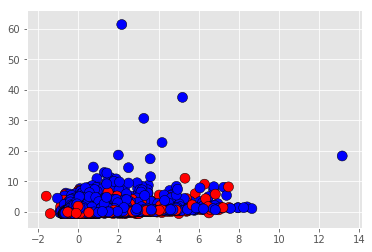

In [16]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

# Sample for plotting 

In [ ]:
# import gc
# gc.collect()

In [ ]:
# take similar non frauds to balance the data set 
# under sampling (i.e. use all the smaller class and randomly select same number of majority class 
# several times to make multiple data sets and then combine all classification results) to balance 
# it this is best way for this without loosing information


df_train_all = cc_df[0:500] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['defaulters'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['defaulters'] == 0]
print(' we have ' + str(len(df_train_1)) +" frauds")


df_sample=df_train_0.sample(200)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset

df_train.to_csv('balanced1.csv')

In [ ]:
csv_path = os.path.join('balanced1.csv')
cc_df1 = pd.read_csv(csv_path)

cc_df1.head()

In [ ]:
X1 = np.column_stack((cc_df.Total_Bill,cc_df.Total_Pay))
X1

X1=preprocessing.scale(X1)

y1  = np.array((cc_df.defaulters))
y1

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,random_state=1, stratify=y1)

In [ ]:
# from sklearn import preprocessing
# X_train1 = preprocessing.scale(X_train1)
# X_test1 = preprocessing.scale(X_test1)

In [ ]:
from sklearn.svm import SVC 
# from sklearn.svm import SVC 
from matplotlib import style
style.use("ggplot")
model1 = SVC(kernel='linear')
# model.fit(X, y)
model1.fit(X_train1, y_train1)

In [ ]:
print('Test Acc: %.3f' % model1.score(X_test1, y_test1))

In [ ]:
model1 = SVC(kernel='linear')
model1.fit(X_train1, y_train1)
predictions = model.predict(X_test1)

In [ ]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()